<a href="https://colab.research.google.com/github/Pritu04/Python/blob/main/Hotel_Booking_EDA_Submission_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** Hotel Booking EDA Submission Project**

**Platform:** Google Colab  
**Tool:** Python  
**Dataset:** Hotel Bookings (1).csv  
**Project Type:** Exploratory Data Analysis (EDA)
**Project By: Priti**

**1. Project Overview**

This project performs Exploratory Data Analysis (EDA) on the Hotel Bookings Dataset to understand booking patterns, cancellations, customer behavior, seasonality, and factors affecting hotel reservations.

Objectives:

Analyze booking trends and cancellations

Understand customer demographics

Identify seasonal demand patterns

Provide actionable business insights


**2. Dataset Description**

Dataset Name: hotel_bookings.csv

Key Columns:

hotel – Resort Hotel / City Hotel

is_canceled – Booking cancellation status

lead_time – Days between booking and arrival

arrival_date_year, arrival_date_month

stays_in_weekend_nights, stays_in_week_nights

adults, children, babies

country

market_segment

deposit_type

adr – Average Daily Rate


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_theme()


# Load Dataset (Code cell)

In [2]:
df = pd.read_csv("Hotel Bookings (1).csv")
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Dataset Understanding
We check the shape, data types, missing values, and summary statistics.


In [3]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.info()
df.describe()


Rows: 119390
Columns: 32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int6

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Check Missing Values

In [4]:
df.isnull().sum().sort_values(ascending=False).head(15)


,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


# Data Cleaning

## Data Cleaning
- Fill missing values in important columns  
- Remove invalid records (where total guests = 0)


In [5]:
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Remove invalid bookings: adults+children+babies = 0
df = df[(df['adults'] + df['children'] + df['babies']) > 0]

df.isnull().sum().sort_values(ascending=False).head(10)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


**EDA Section (Charts + Documentation)**

## EDA 1: Hotel Type Distribution
Shows how many bookings came from City Hotel vs Resort Hotel.


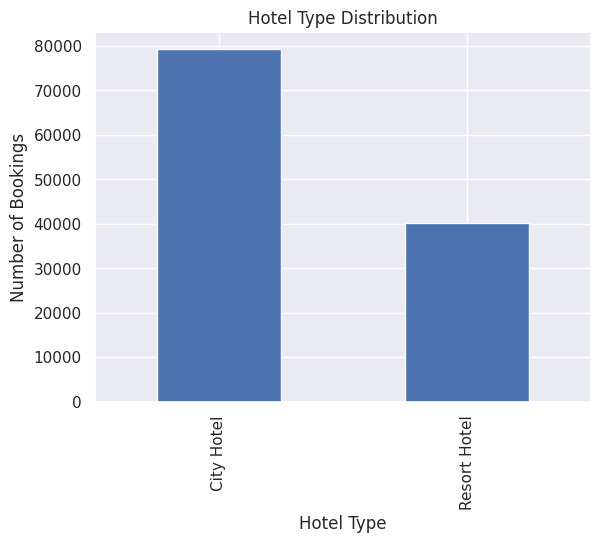

In [6]:
df['hotel'].value_counts().plot(kind='bar')
plt.title("Hotel Type Distribution")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.show()


**#Cancellation Analysis**
## EDA 2: Cancellation Analysis
Checks how many bookings were canceled vs not canceled.


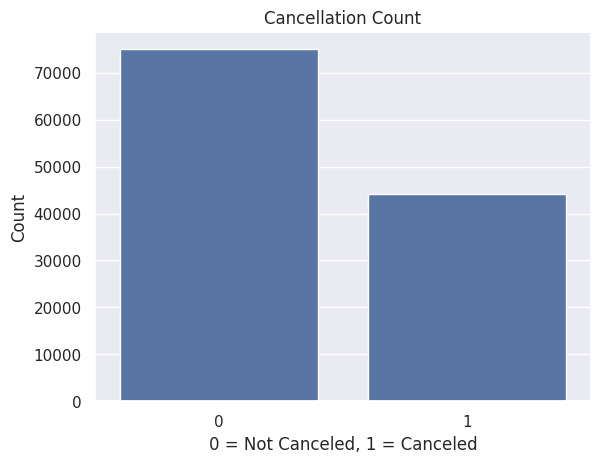

In [7]:
sns.countplot(x='is_canceled', data=df)
plt.title("Cancellation Count")
plt.xlabel("0 = Not Canceled, 1 = Canceled")
plt.ylabel("Count")
plt.show()


## EDA 3: Top 10 Countries by Bookings
Shows which countries contribute the most bookings.


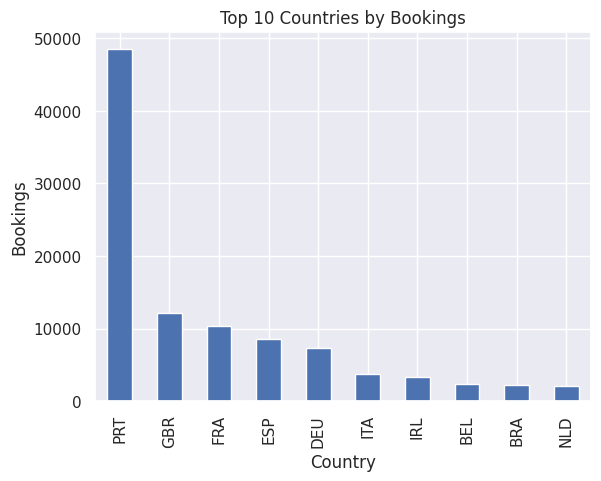

In [8]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Bookings")
plt.xlabel("Country")
plt.ylabel("Bookings")
plt.show()


## EDA 4: ADR Distribution(Pricing)
ADR = Average Daily Rate (price per night). This chart shows pricing distribution.


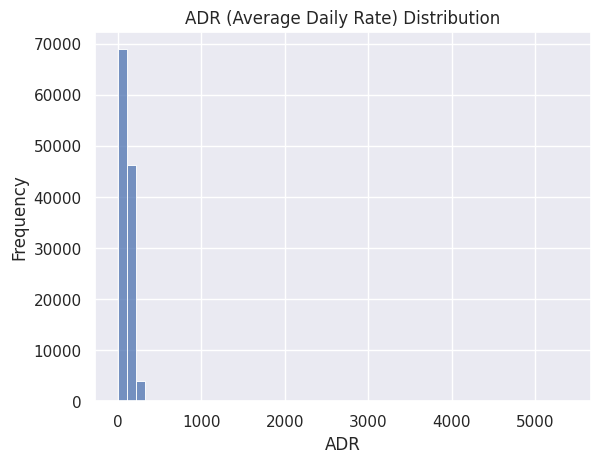

In [9]:
sns.histplot(df['adr'], bins=50)
plt.title("ADR (Average Daily Rate) Distribution")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()


## EDA 5: Market Segment Distribution
Shows which booking channels contribute the most (Online TA, Direct, Corporate, etc.).


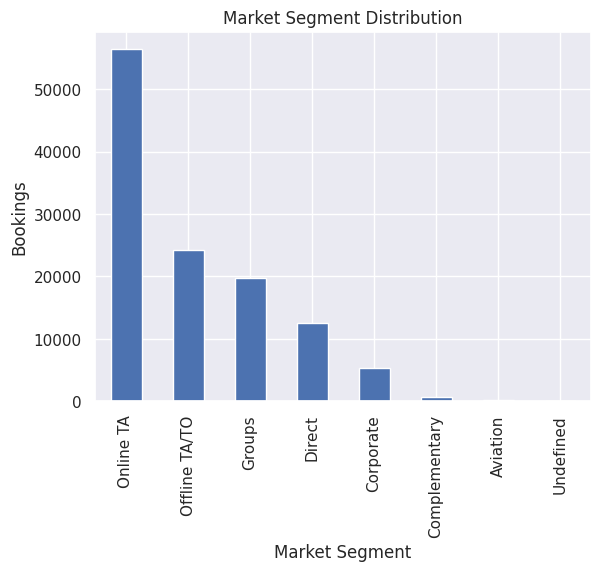

In [10]:
df['market_segment'].value_counts().plot(kind='bar')
plt.title("Market Segment Distribution")
plt.xlabel("Market Segment")
plt.ylabel("Bookings")
plt.show()


## EDA 6: Monthly Booking Trend
Shows seasonality in bookings based on month.


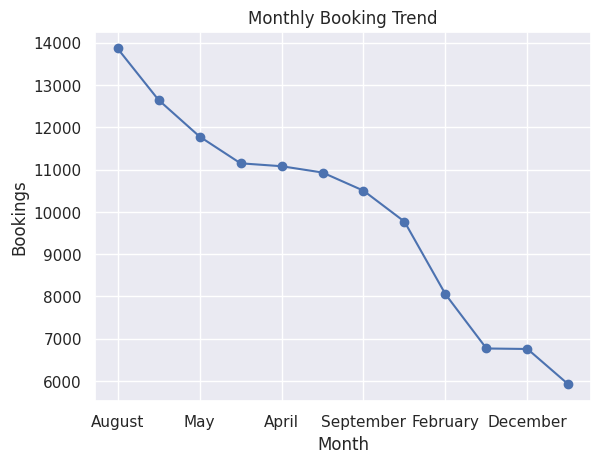

In [11]:
df['arrival_date_month'].value_counts().plot(kind='line', marker='o')
plt.title("Monthly Booking Trend")
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.show()


## EDA 7: Lead Time vs Cancellation
Checks if bookings made earlier (high lead time) cancel more.


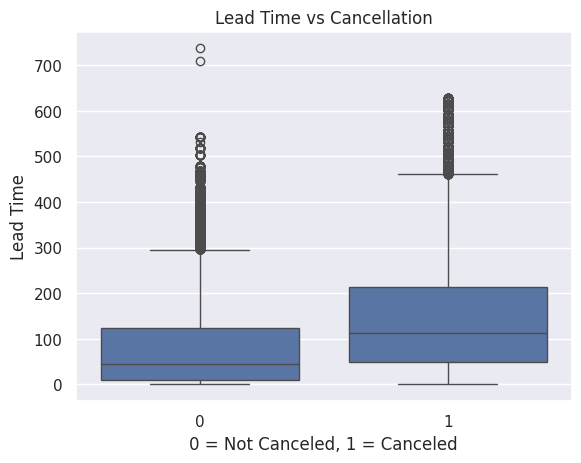

In [12]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs Cancellation")
plt.xlabel("0 = Not Canceled, 1 = Canceled")
plt.ylabel("Lead Time")
plt.show()


EXTRA EDA CHARTS (Advanced Analysis)

## EDA 8: ADR vs Hotel Type
This analysis compares the **Average Daily Rate (ADR)** between **City Hotels** and **Resort Hotels**.
It helps understand which hotel type generally charges higher prices.


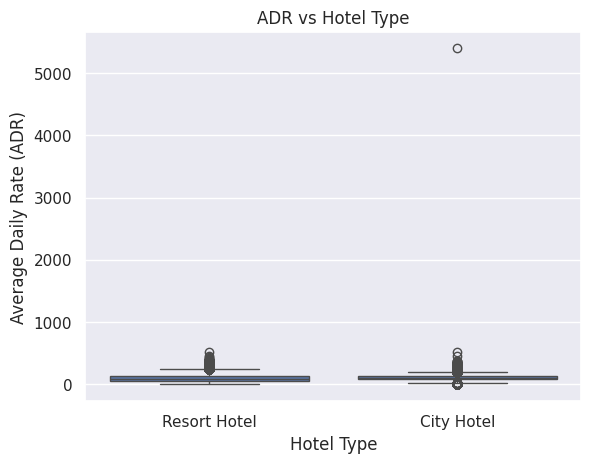

In [13]:
sns.boxplot(x='hotel', y='adr', data=df)
plt.title("ADR vs Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()


## EDA 9: Cancellation Rate by Market Segment
This chart shows how cancellation behavior varies across different booking channels
such as Online TA, Direct, Corporate, etc.


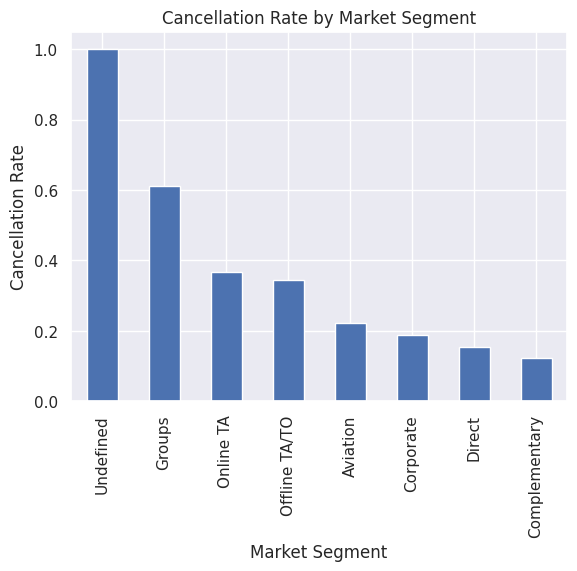

In [14]:
cancel_by_segment = (
    df.groupby('market_segment')['is_canceled']
    .mean()
    .sort_values(ascending=False)
)

cancel_by_segment.plot(kind='bar')
plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Cancellation Rate")
plt.show()


## EDA 10: Country vs Cancellations
This analysis focuses on the **top 10 countries by bookings** and compares
how many bookings were canceled vs not canceled.


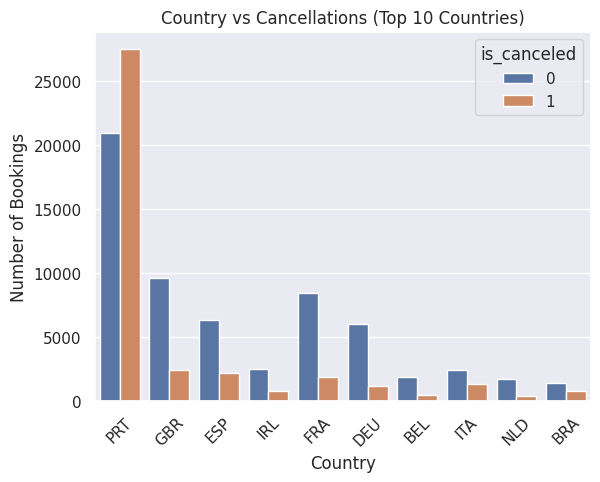

In [15]:
top_countries = df['country'].value_counts().head(10).index

country_cancel = df[df['country'].isin(top_countries)]

sns.countplot(
    data=country_cancel,
    x='country',
    hue='is_canceled'
)
plt.title("Country vs Cancellations (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


**Update Your Insights Section**



## Additional Insights
- Resort Hotels tend to have higher ADR than City Hotels  
- Online TA bookings have the highest cancellation rates  
- Cancellation behavior varies significantly by country  
- Understanding these patterns can help hotels reduce revenue loss  

## Final Conclusion
This project provides a comprehensive understanding of hotel booking behavior.
The insights can support better pricing strategies, demand forecasting, and
cancellation control policies.


